# World Happiness Project

we need to predict the happiness score considering all the other factors mentioned in the dataset

In [2]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

# Raw URL to the dataset file
url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'

# Read the dataset into a DataFrame
df = pd.read_csv(url)

# Now you can work with the 'df' DataFrame


In [4]:
df

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

In [5]:
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

In [8]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [9]:
#checking the columns of datset
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
#checking the null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [11]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

# EDA

*Univariate Analysis*

In [12]:
df['Country'].value_counts()

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64

In [13]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

There are 10 different regions. Most of the countries in this dataset is from Sub-Saharan Africa and Central and Eastern Europe.

[Text(0, 0, 'Western Europe'),
 Text(1, 0, 'North America'),
 Text(2, 0, 'Australia and New Zealand'),
 Text(3, 0, 'Middle East and Northern Africa'),
 Text(4, 0, 'Latin America and Caribbean'),
 Text(5, 0, 'Southeastern Asia'),
 Text(6, 0, 'Central and Eastern Europe'),
 Text(7, 0, 'Eastern Asia'),
 Text(8, 0, 'Sub-Saharan Africa'),
 Text(9, 0, 'Southern Asia')]

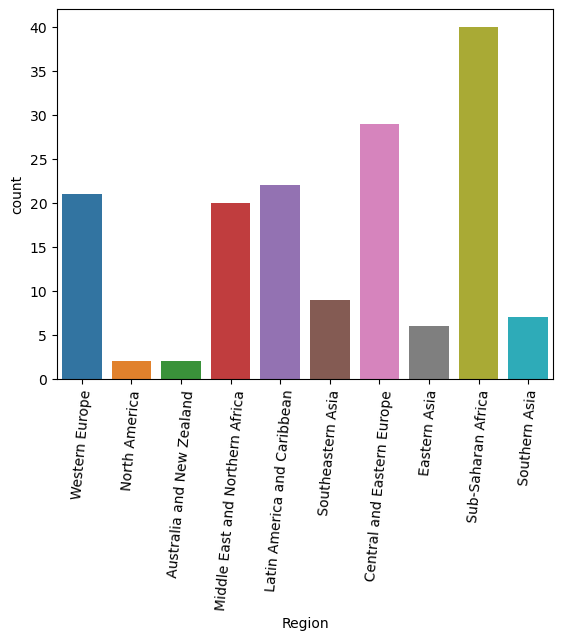

In [14]:
plt.figure()
count=sns.countplot(df['Region'])
count.set_xticklabels(count.get_xticklabels(), rotation=85)

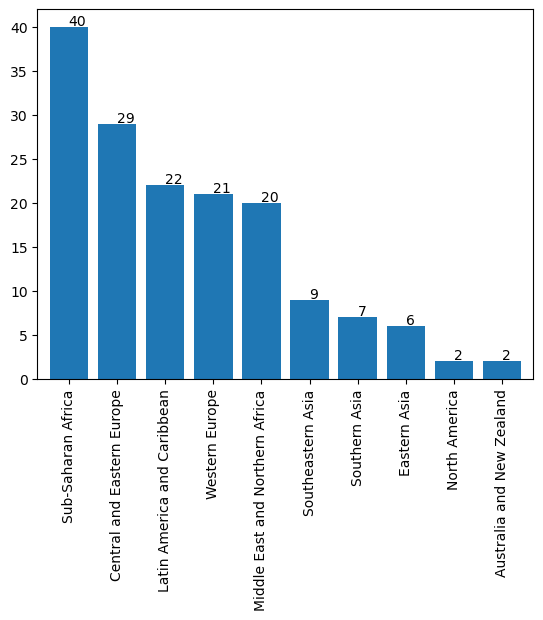

In [15]:
s = df['Region'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Region + 0.2 , v.Region, color='0000')

Most of the countries in this dataset is from Sub-Saharan Africa and Central and Eastern Europe.

In [16]:
df['Happiness Rank'].value_counts()

82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64

In [17]:
df['Happiness Score'].describe()

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

The minimum value is 2.83 and maximum value is 7.58 and mean value is 5.37

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

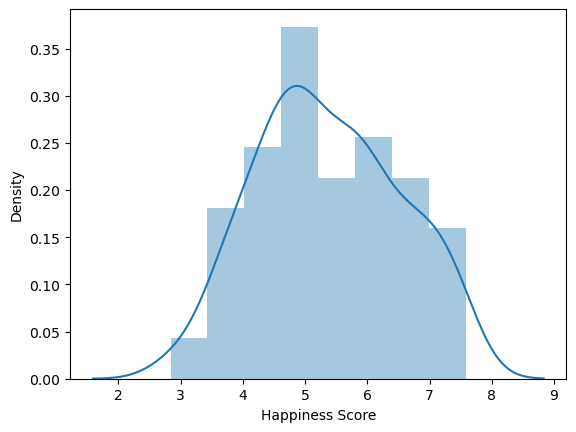

In [18]:
sns.distplot(df['Happiness Score'],kde=True)

Right skewed data

<AxesSubplot:xlabel='Happiness Score'>

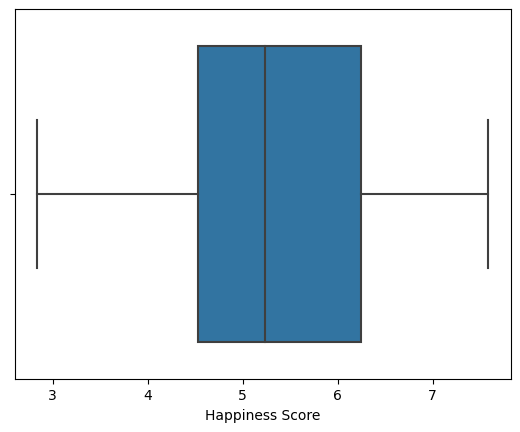

In [19]:
sns.boxplot(df['Happiness Score'])

zero outliers

In [20]:
df['Standard Error'].describe()

count    158.000000
mean       0.047885
std        0.017146
min        0.018480
25%        0.037268
50%        0.043940
75%        0.052300
max        0.136930
Name: Standard Error, dtype: float64

The Standard Error ranges from 0.047 to 0.136

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

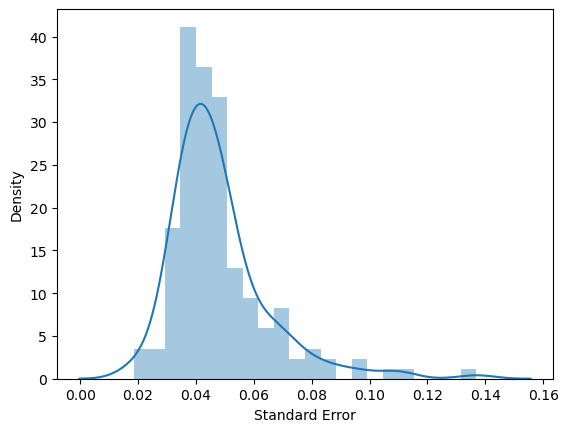

In [22]:
sns.distplot(df['Standard Error'])

left skewed

<AxesSubplot:xlabel='Standard Error'>

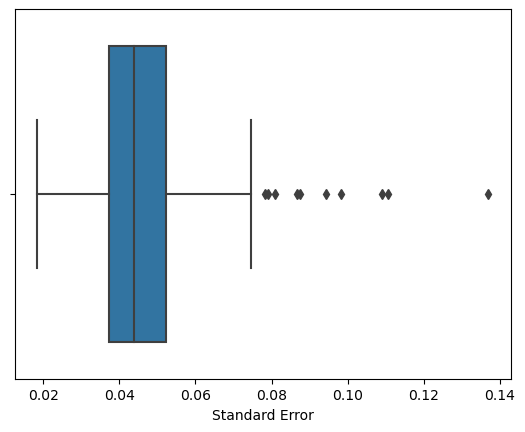

In [23]:
sns.boxplot(df['Standard Error'])

few outliers

In [24]:
df['Economy (GDP per Capita)'].describe()

count    158.000000
mean       0.846137
std        0.403121
min        0.000000
25%        0.545808
50%        0.910245
75%        1.158448
max        1.690420
Name: Economy (GDP per Capita), dtype: float64

The GDP ranges from 0 to 1.69. If we observe the different percentile and from 75th percentile to maximum value it follows the same trend as like 25th to 50th percentile, and 50th to 75th percentile,so this indicates that the presence of outliers is significantly least

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

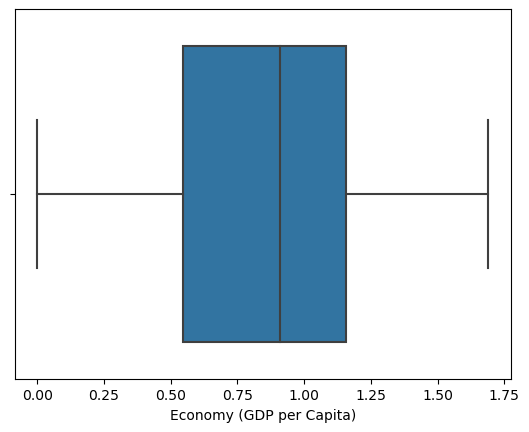

In [25]:
sns.boxplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

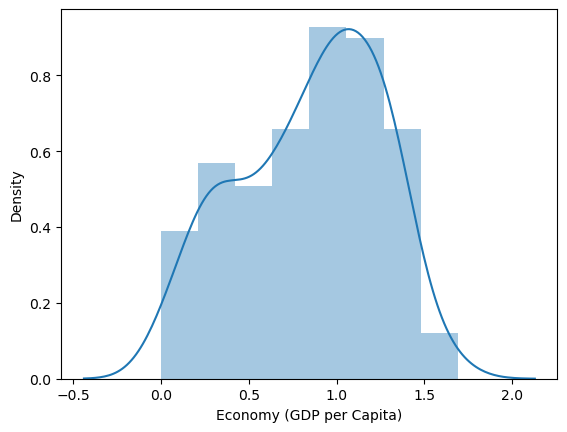

In [26]:
sns.distplot(df['Economy (GDP per Capita)'],kde=True)

Right skewed data

In [27]:
df['Family'].describe()

count    158.000000
mean       0.991046
std        0.272369
min        0.000000
25%        0.856823
50%        1.029510
75%        1.214405
max        1.402230
Name: Family, dtype: float64

The minimum value is 0 and maximum value is 1.4. By observing different percentiles and max value we can say that there are not much outliers.

<AxesSubplot:xlabel='Family', ylabel='Density'>

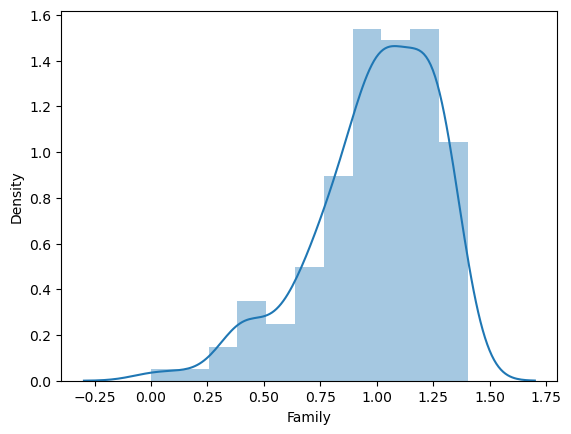

In [28]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Family'>

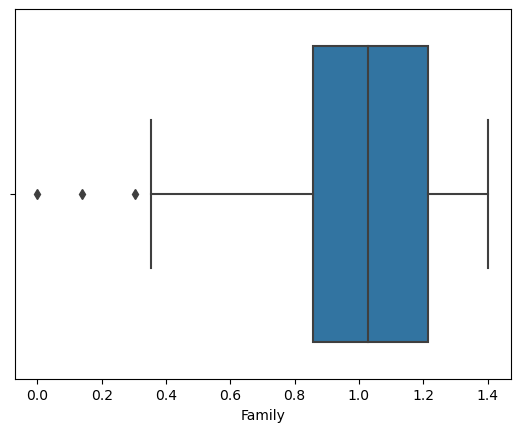

In [29]:
sns.boxplot(df['Family'])

In [30]:
df['Health (Life Expectancy)'].describe()

count    158.000000
mean       0.630259
std        0.247078
min        0.000000
25%        0.439185
50%        0.696705
75%        0.811013
max        1.025250
Name: Health (Life Expectancy), dtype: float64

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

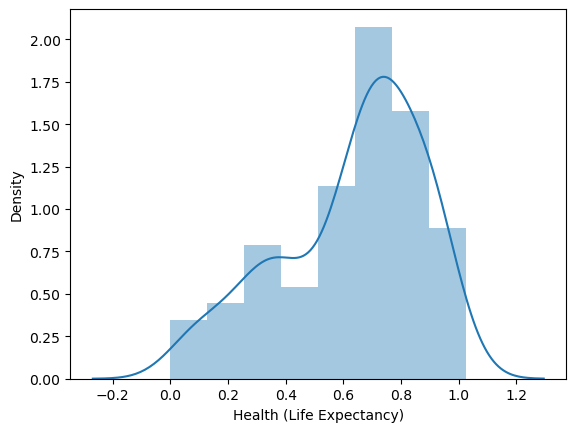

In [31]:
sns.distplot(df['Health (Life Expectancy)'],kde=True)

<AxesSubplot:xlabel='Health (Life Expectancy)'>

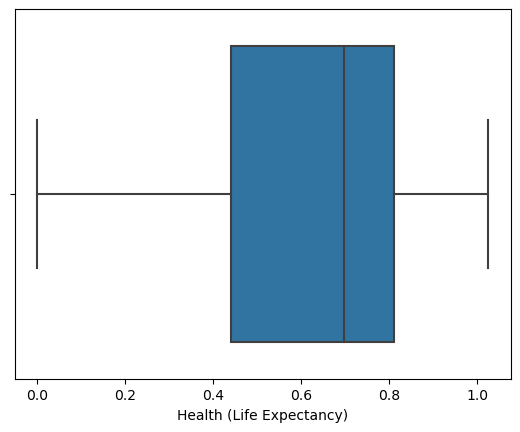

In [32]:
sns.boxplot(df['Health (Life Expectancy)'])

In [33]:
df['Freedom'].describe()

count    158.000000
mean       0.428615
std        0.150693
min        0.000000
25%        0.328330
50%        0.435515
75%        0.549092
max        0.669730
Name: Freedom, dtype: float64

The value ranges from 0 to 0.66.

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

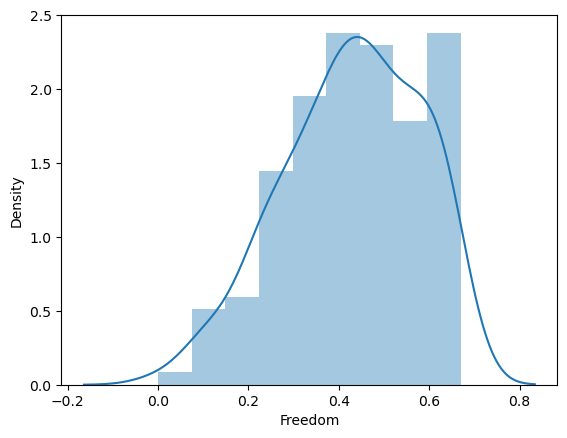

In [34]:
sns.distplot(df['Freedom'])

<AxesSubplot:xlabel='Freedom'>

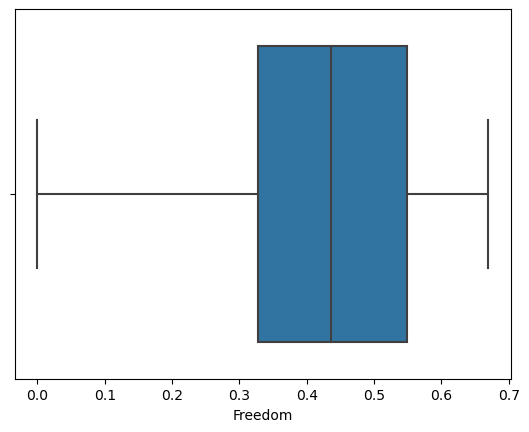

In [35]:
sns.boxplot(df['Freedom'])

In [36]:
df['Trust (Government Corruption)'].describe()

count    158.000000
mean       0.143422
std        0.120034
min        0.000000
25%        0.061675
50%        0.107220
75%        0.180255
max        0.551910
Name: Trust (Government Corruption), dtype: float64

The value ranges from 0 to 0.55 and mean is 0.143

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

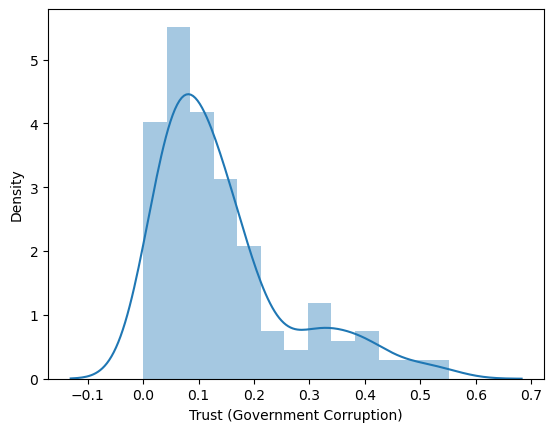

In [37]:
sns.distplot(df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Trust (Government Corruption)'>

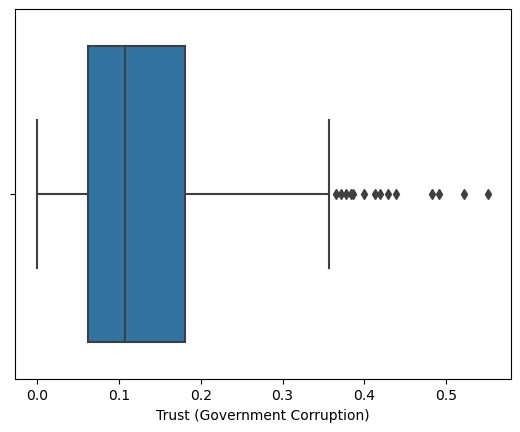

In [38]:
sns.boxplot(df['Trust (Government Corruption)'])

There are such outliers.

In [39]:
df['Generosity'].describe()

count    158.000000
mean       0.237296
std        0.126685
min        0.000000
25%        0.150553
50%        0.216130
75%        0.309883
max        0.795880
Name: Generosity, dtype: float64

The value ranges from 0 to 0.79.

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

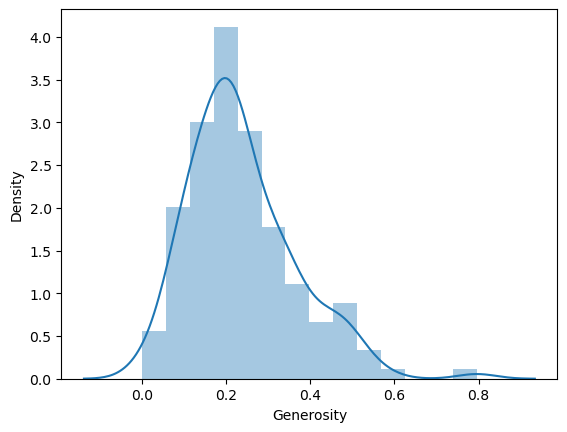

In [40]:
sns.distplot(df['Generosity'])

<AxesSubplot:xlabel='Generosity'>

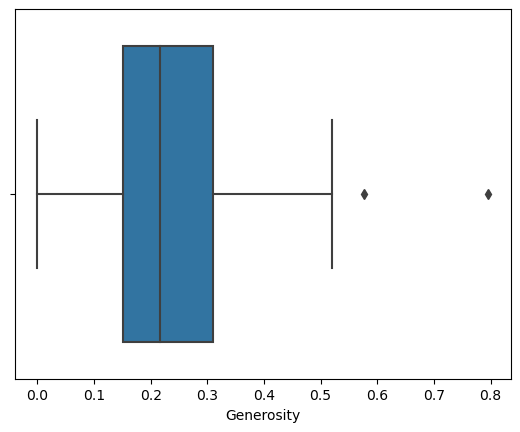

In [41]:
sns.boxplot(df['Generosity'])

little bit outliers

In [43]:
df['Dystopia Residual'].describe()

count    158.000000
mean       2.098977
std        0.553550
min        0.328580
25%        1.759410
50%        2.095415
75%        2.462415
max        3.602140
Name: Dystopia Residual, dtype: float64

The value ranges from 0.32 to 3.6

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

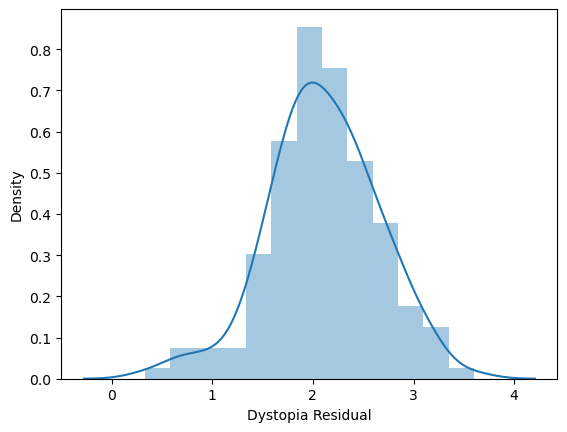

In [44]:
sns.distplot(df['Dystopia Residual'])

<AxesSubplot:xlabel='Dystopia Residual'>

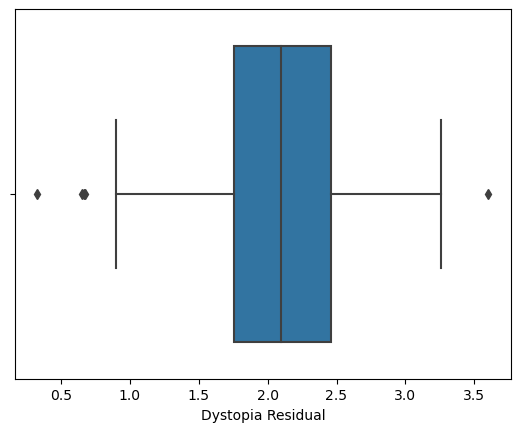

In [45]:
sns.boxplot(df['Dystopia Residual'])

# Multivariate Analysis

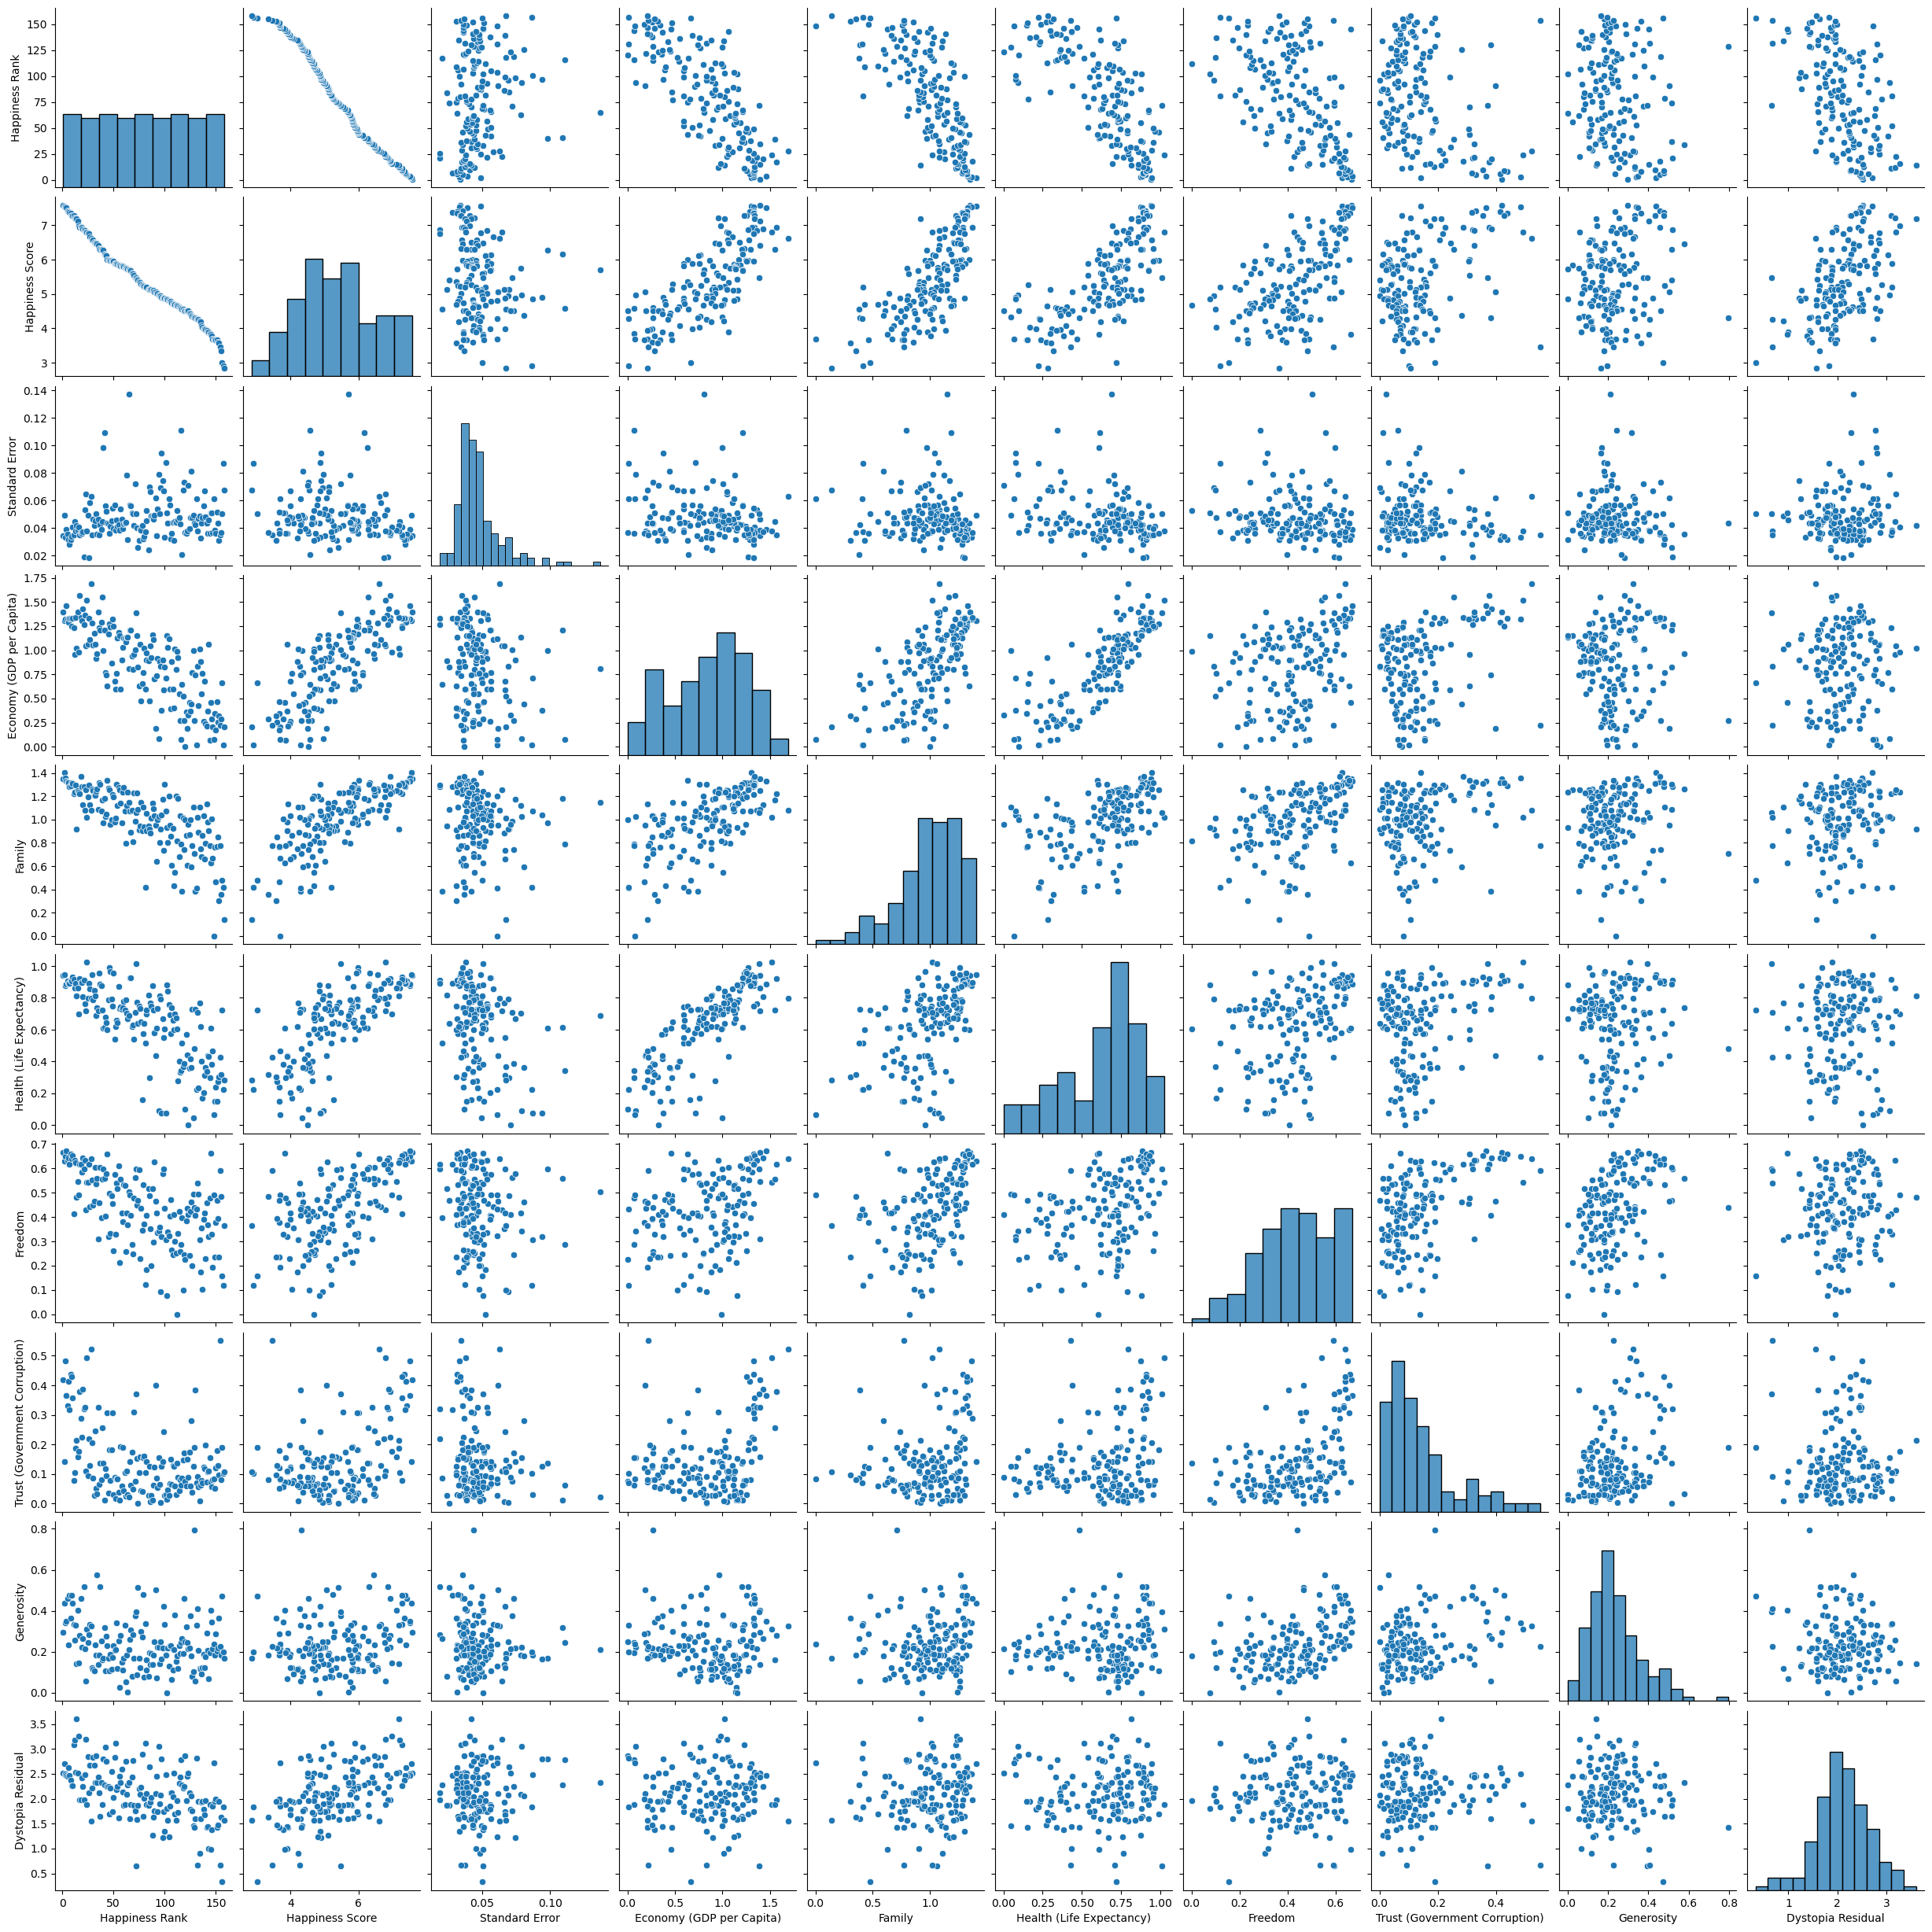

In [46]:
sns.pairplot(df)

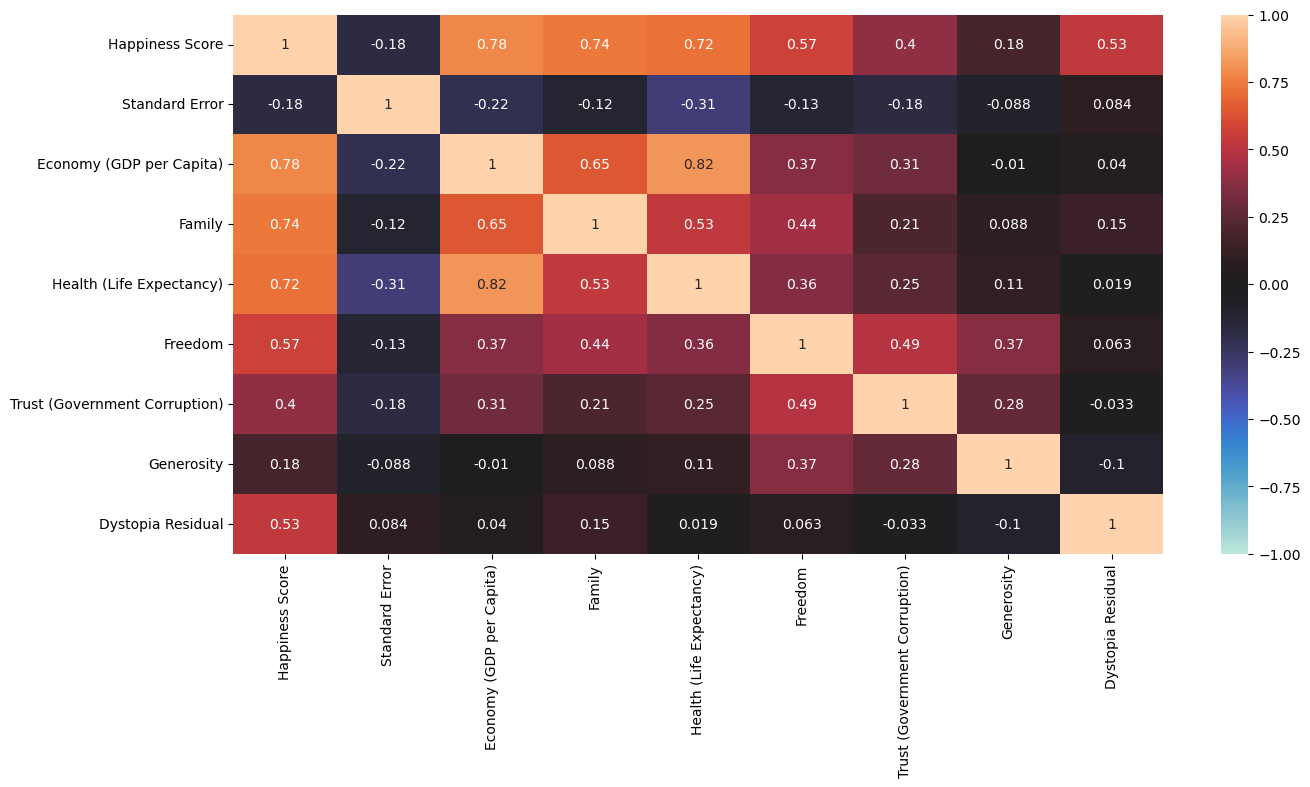

In [47]:
#Since we have happiness score we can remove happiness rank column so that it will be quite easy for the further analysis.
df=df.drop(columns=['Happiness Rank'])
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

1.Happiness score is highly positively correlated(+0.78).

2.The major important factor for the happiness score is GDP,Family,Life expectency or Health

3.standard error is the only thing which is negatively correlated.

In [48]:
import plotly.express as px

fig=px.scatter_3d(df,x='Economy (GDP per Capita)',y='Happiness Score',z='Family',color='Region',opacity=0.7)
fig

This is the best plot representing how GDP,Family and Happiness Scores behaves in the similar fashion.

# Bivariate Analysis

In [49]:
fig=px.bar(df,y='Happiness Score',x='Country',text='Happiness Score',color='Region')
fig

#lets keep the annotations at the top of the bar graph
fig.update_traces(texttemplate='%{text:.2s}',
                 textposition='outside')

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig

Western Europe, Australia,North America, Latin America and carabbian has got significantly high Happiness score. There are countries Isrel in the northern africa which has got good Happiness Score. Sub sahara africa has got countries which has low Happiness scores.

In [51]:
px.bar(df, x='Economy (GDP per Capita)', y='Happiness Score', color='Region', animation_frame='Family', animation_group='Region', range_y=[0,8])


In [52]:
px.scatter(df,x='Economy (GDP per Capita)',y='Happiness Score',color='Region',hover_data=['Region'])


The above graph clearly depicts that irrespective of the region the GDP is directly propotional to Happiness Score.

In [53]:
px.scatter(df,x='Health (Life Expectancy)',y='Happiness Score',color='Region',hover_data=['Region'])

The above graph is clearly infers that Health is the major criteria for the happiness scores irrespective of the region

In [54]:
px.scatter(df,x='Family',y='Happiness Score',color='Region',hover_data=['Region'])

The above graph is clearly infers that Family is the major criteria for the happiness scores irrespective of the region.

In [55]:
px.scatter(df,x='Freedom',y='Happiness Score',color='Region',hover_data=['Region'])

Freedom is also a important criterion for Happiness Score.

In [56]:
px.scatter(df,x='Economy (GDP per Capita)',y='Family',color='Region',hover_data=['Region'])

Both are interrelated.

# Data Cleaning

In [57]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [58]:
#Lets drop country and region as its no longer useful further.
df.drop(['Country', 'Region'], axis='columns', inplace=True)
from scipy.stats import zscore

In [59]:
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [60]:
df_new.head()

Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0            7.587         0.03411                   1.39651  1.34951   
1            7.561         0.04884                   1.30232  1.40223   
2            7.527         0.03328                   1.32548  1.36058   
3            7.522         0.03880                   1.45900  1.33095   
4            7.427         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [61]:
df_new.shape

(149, 9)

In [62]:
df.shape

(158, 9)

There is only 5% data has lost so we can continue(158-149/158=0.056=5.6%)

# Checking for Skewness

In [63]:
df_new.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [64]:
from scipy import stats
df_new['Standard Error'] =stats.boxcox(df_new['Standard Error'])[0]

In [65]:
df_new['Standard Error'].skew()

-0.010172870945015405

In [66]:
df_new['Family'] =np.sqrt(df_new['Family'])

In [67]:
df_new['Family'].skew()

-1.182068652073126

In [68]:
df_new['Trust (Government Corruption)'] =np.log(df_new['Trust (Government Corruption)'])[0]
df_new['Trust (Government Corruption)'].skew()

0

In [69]:
df_new['Generosity'] =np.log(df_new['Generosity'])[0]
df_new.skew()

Happiness Score                  0.169740
Standard Error                  -0.010173
Economy (GDP per Capita)        -0.390657
Family                          -1.182069
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    0.000000
Generosity                       0.000000
Dystopia Residual               -0.021144
dtype: float64

# Model Building

In [70]:
x=df_new.drop('Happiness Score',axis=1)
y=df_new['Happiness Score']
x.head()

Standard Error  Economy (GDP per Capita)    Family  \
0       -4.039042                   1.39651  1.161684   
1       -3.540284                   1.30232  1.184158   
2       -4.073950                   1.32548  1.166439   
3       -3.857918                   1.45900  1.153668   
4       -3.981440                   1.32629  1.150048   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                      -0.868025   
1                   0.94784  0.62877                      -0.868025   
2                   0.87464  0.64938                      -0.868025   
3                   0.88521  0.66973                      -0.868025   
4                   0.90563  0.63297                      -0.868025   

   Generosity  Dystopia Residual  
0   -1.214764            2.51738  
1   -1.214764            2.70201  
2   -1.214764            2.49204  
3   -1.214764            2.46531  
4   -1.214764            2.45176

In [71]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [72]:
x.shape

(149, 8)

In [73]:
y.shape

(149,)

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print('x_train shape is :',x_train.shape)
print('\n')
print('x_test shape is :',x_test.shape)
print('\n')
print('y_train shape is :',y_train.shape)
print('\n')
print('y_test shape is :',y_test.shape)

x_train shape is : (111, 8)


x_test shape is : (38, 8)


y_train shape is : (111,)


y_test shape is : (38,)


In [30]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,11):
    X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)
        

Training Score 0.9916407503382842 RandomState 0
Testing Score 0.9940345302510685 RandomState 0


MAXINING TESTING SCORE 0.9940345302510685 ON RANDOM STATE OF 0
Training Score 0.9923719891745598 RandomState 1
Testing Score 0.9901406897573897 RandomState 1


Training Score 0.9916436351795682 RandomState 2
Testing Score 0.9920818427746076 RandomState 2


Training Score 0.9911784460870166 RandomState 3
Testing Score 0.993630136765512 RandomState 3


Training Score 0.9909291933080244 RandomState 4
Testing Score 0.9938228299829527 RandomState 4


Training Score 0.9922863866926971 RandomState 5
Testing Score 0.9906463184160221 RandomState 5


Training Score 0.9907160861218112 RandomState 6
Testing Score 0.9954846871242078 RandomState 6


MAXINING TESTING SCORE 0.9954846871242078 ON RANDOM STATE OF 6
Training Score 0.9925167040248101 RandomState 7
Testing Score 0.9900531470240674 RandomState 7


Training Score 0.9935814567533967 RandomState 8
Testing Score 0.9880645821683378 RandomState 8


Tr

In [31]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.9954846871242078 On Random State 6


In [32]:
#splliting our data into train test split and randomstate 6
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=6)

In [33]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
#training score
regression.score(X_train,y_train) 

0.9907160861218112

In [35]:
#testing score
regression.score(X_test,y_test) 

0.9954846871242078

In [36]:
# Training Score = 99.07160861218112%
# Testing Score =  99.54846871242079%

In [37]:
y_pred=regression.predict(X_test)
y_pred

array([7.38124678, 7.51402601, 4.70906765, 5.09513256, 5.88820313,
       4.62811597, 7.4716999 , 7.6803683 , 5.06066711, 6.179648  ,
       5.03213299, 5.97448085, 4.53078513, 6.50550921, 4.26994824,
       3.85861938, 5.6660387 , 4.82435779, 4.590963  , 3.97771255,
       5.27338414, 6.83333975, 4.03062823, 5.78978233, 4.68551635,
       4.69293377, 3.76519374, 4.14776543, 6.17476755, 5.64700631,
       6.33413208, 5.48167528, 6.74920532, 6.31888311, 6.46482663,
       7.06220059, 4.94656831, 3.930563  , 7.01307388, 7.16858326])

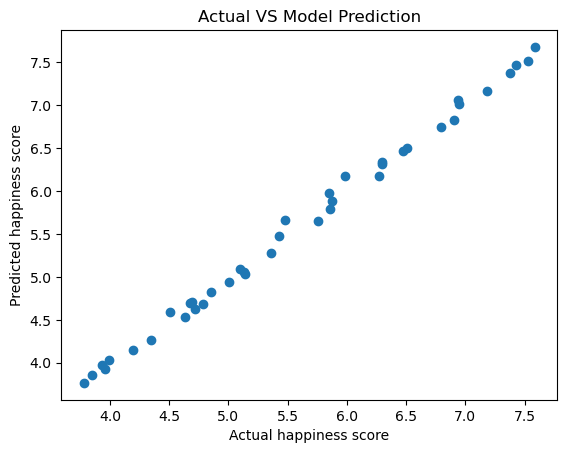

In [38]:
# how our pred vs actual look like in graph 
plt.scatter(y_test , y_pred)
plt.xlabel('Actual happiness score')
plt.ylabel('Predicted happiness score')
plt.title('Actual VS Model Prediction')
plt.show()

In [39]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [40]:
# again predict 
y_pred = regression.predict(X_test)

In [41]:
#MAE
mean_absolute_error(y_test,y_pred)

0.06041638987350192

In [42]:
#MSE
mean_squared_error(y_test,y_pred)

0.005837769876800314

In [43]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.07640530005700072

In [44]:
#now we sucessfully created model and our score is great so we check it for overfitting 
#to check overfitting we have to use regularization technique

# in regularization we have 3 type but we use only 2 



# 3 types are 1) LASSO (L1 form) 2)RIDGE (L2 FORM)  3)ELASTIONET

In [45]:
#BASICALLY LASSO N RIDGE WILL GIVE YOU BEST LEARNING RATE THAT IS ALPHA SCORE AND TRAIN MODEL ACCORDING TO IT

In [46]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

# LASSO MODEL

In [47]:
lasscv = LassoCV(alphas = None , max_iter = 100, normalize = True)

lasscv.fit(X_train , y_train)

LassoCV(max_iter=100, normalize=True)

In [48]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

0.00044422141401781825

In [49]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.00044422141401781825)

In [50]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.9955233955514966

# RIDGE MODEL

In [51]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(X_train , y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [52]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.001

In [53]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.001)

In [54]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.9954846849393908

In [55]:
# LASSO SCORE = 99.55233955514966%
# RIDGE SCORE = 99.54846849393908%

In [56]:
# after seeing LASSO and RIDGE score thus we can conclude that our model was not overfitted model
## for conformation lets see cross validation of the model

# Cross Vaildation

In [57]:
#Cross Vaildation
training=regression.score(X_train,y_train)
testing=regression.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X_new,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.8291492271638913 and the R2 score for Training is 0.9907160861218112 and R2 score for the Testing is0.9954846871242078


At cross fold 3 the cv score is 0.8597622227688059 and the R2 score for Training is 0.9907160861218112 and R2 score for the Testing is0.9954846871242078


At cross fold 4 the cv score is 0.8051007531385043 and the R2 score for Training is 0.9907160861218112 and R2 score for the Testing is0.9954846871242078


At cross fold 5 the cv score is 0.7719326936341073 and the R2 score for Training is 0.9907160861218112 and R2 score for the Testing is0.9954846871242078


At cross fold 6 the cv score is 0.6456219680627275 and the R2 score for Training is 0.9907160861218112 and R2 score for the Testing is0.9954846871242078


At cross fold 7 the cv score is 0.5441729537870253 and the R2 score for Training is 0.9907160861218112 and R2 score for the Testing is0.9954846871242078


At cross fold 8 the cv score is 0.5133460265810152 and the R2 score fo

# as we see all are giving same result so out model is best model without overfitting
Training Score for Linear Regression = 99.07160861218112%
Testing Score for Linear Regression = 99.54846871242079%